Standardization, also known as Z-score normalization or feature scaling, is a common technique used in data preprocessing for machine learning and statistical analysis. It aims to transform the features of a dataset so that they have a mean of 0 and a standard deviation of 1. This process helps to bring all the features to a similar scale, which can be beneficial for certain machine learning algorithms that are sensitive to the magnitude of input features.

Here's how standardization works:

1. **Calculate the Mean and Standard Deviation:** For each feature in your dataset, you calculate the mean (average) and standard deviation. The mean represents the central tendency of the data, and the standard deviation measures the spread or variability of the data points around the mean.

   $$\text{Mean} = \frac{\sum \text{values in the feature}}{\text{number of values in the feature}}$$

   $$\text{Standard Deviation} = \sqrt{\frac{\sum (\text{values in the feature} - \text{mean})^2}{\text{number of values in the feature}}}$$

2. **Standardize the Data:** Once you have the mean and standard deviation for each feature, you can standardize the data by applying the following formula to each data point in the feature:

   $$\text{Standardized Value} = \frac{\text{Original Value} - \text{Mean}}{\text{Standard Deviation}}$$

   This formula subtracts the mean from each data point and then divides the result by the standard deviation. As a result, the transformed data will have a mean of 0 and a standard deviation of 1.

The benefits of standardization include:

1. **Removal of Scale Effects:** Standardization removes the influence of the original scale of the features, making it easier for machine learning algorithms to converge during training. Some algorithms, such as gradient descent-based methods, can converge faster and perform better when input features are on a similar scale.

2. **Interpretability:** Standardized features are more interpretable because they are in terms of standard deviations from the mean. You can easily compare the importance of different features in a standardized dataset.

3. **Outlier Handling:** Standardization can reduce the impact of outliers since the transformation centers the data around zero. Outliers can have a disproportionately large effect on models that are not scale-invariant.

It's important to note that standardization does not change the distribution of the data; it only scales and shifts it. If the original data is not normally distributed, the standardized data will still exhibit the same distribution characteristics.

In summary, standardization is a feature scaling technique that transforms data to have a mean of 0 and a standard deviation of 1. This normalization process helps improve the performance of some machine learning algorithms and makes it easier to interpret the importance of different features in a dataset.

## Manual method of Feature scaling (Standardization)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
total_bill = list(df['total_bill'])

<AxesSubplot:ylabel='Count'>

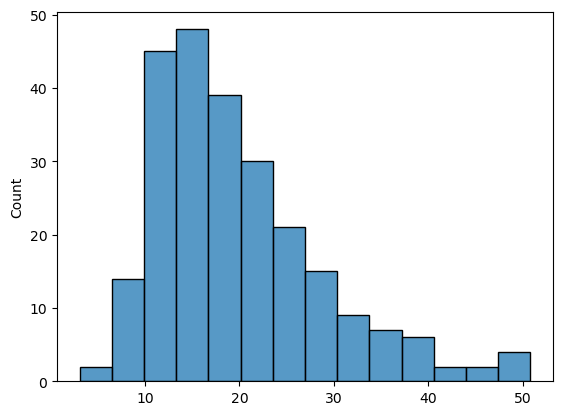

In [8]:
sns.histplot(total_bill)

In [9]:
mean_total_bill=np.mean(total_bill)
std_total_bill=np.std(total_bill)

In [10]:
normalized_dataset = []

for i in total_bill:
    z_score = (i-mean_total_bill)/std_total_bill 
    normalized_dataset.append(z_score)

In [11]:
print(normalized_dataset)

[-0.3147113050904943, -1.0632353132988692, 0.13777989987156145, 0.43831510316725475, 0.540744704290506, 0.6195367051545455, -1.2399545152367863, 0.7985071071171495, -0.5342033074974614, -0.5634689078183903, -1.0711145133852733, 1.7417599174609364, -0.49143050702841123, -0.15262490331304146, -0.557840907756673, 0.2019391005751361, -1.0643609133112126, -0.3935033059545337, -0.31696250511518104, 0.09725829942719795, -0.2100305039425557, 0.05673669898283484, -0.45203450659639155, 2.2100095225958003, 0.003833498402694168, -0.2224121040783337, -0.7221785095588127, -0.7987193103981653, 0.21544630072325727, -0.015301701807144186, -1.1521577142739994, -0.16162970341178864, -0.5319521074727743, 0.10176069947657193, -0.22578890411536368, 0.4810879036363046, -0.3912521059298469, -0.32146490516455467, -0.12335930299211233, 1.2926455125359115, -0.4216433062631192, -0.2618081045103532, -0.6580193088552376, -1.137524914113535, 1.1947183114620337, -0.16838330348584943, 0.2751031013774587, 1.41983831393

<AxesSubplot:ylabel='Count'>

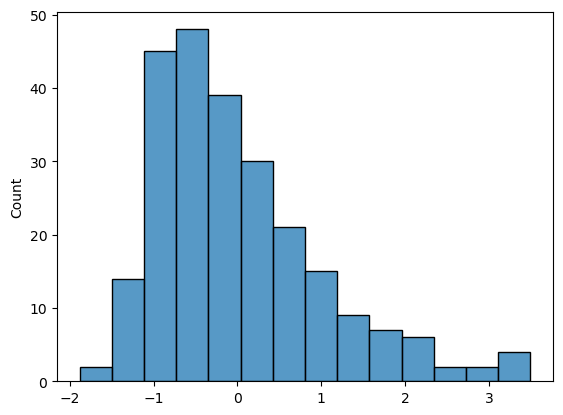

In [12]:
sns.histplot(normalized_dataset)

We can see the range is now from (-2,3) after standardization but the distribution is still same. So we have scale down the data

## Doing the same thing ( Standardization ) using Sklearn Function

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
scaler=StandardScaler()
scaler.fit(df[['total_bill']])

StandardScaler()

In [26]:
new_standardized_df = pd.DataFrame(scaler.transform(df[['total_bill']]),columns=['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

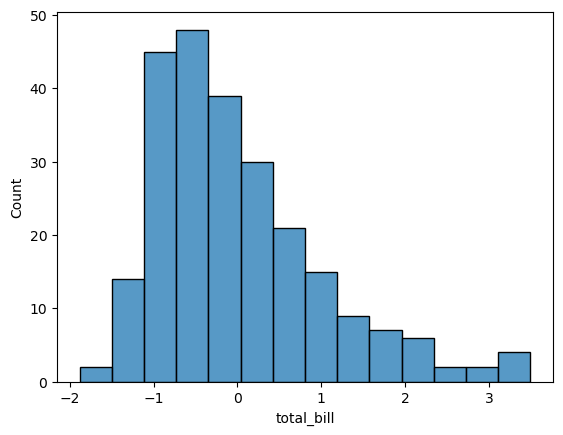

In [27]:
sns.histplot(new_standardized_df['total_bill'])

## We can also scale down multiple features together!

In [28]:
scaler=StandardScaler()
scaler.fit(df[['tip','size']])

StandardScaler()

In [30]:
new_std_df = pd.DataFrame(scaler.transform(df[['tip','size']]),columns=['tip','size'])
new_std_df

,tip,size
0,-1.439947,-0.600193
1,-0.969205,0.453383
2,0.363356,0.453383
3,0.225754,-0.600193
4,0.443020,1.506958
...,...,...
239,2.115963,0.453383
240,-0.722971,-0.600193
241,-0.722971,-0.600193
242,-0.904026,-0.600193


<AxesSubplot:xlabel='tip', ylabel='Count'>

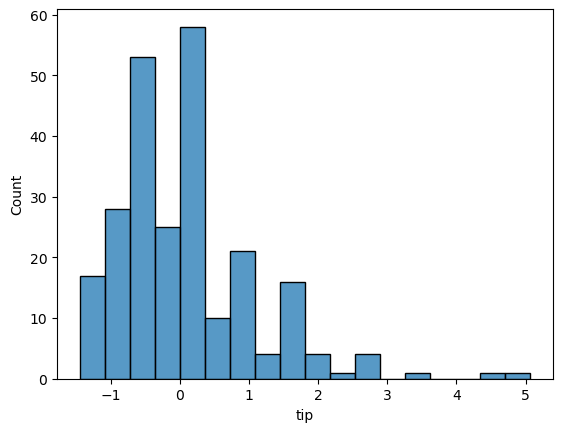

In [31]:
sns.histplot(new_std_df['tip'])

<AxesSubplot:xlabel='size', ylabel='Count'>

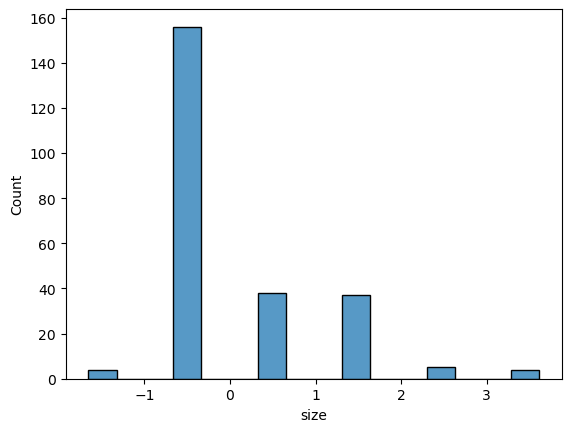

In [32]:
sns.histplot(new_std_df['size'])